Importing module

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder

import re

import warnings
warnings.filterwarnings('ignore')

reading csv

In [11]:
heart = pd.read_csv('heart.csv')

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [12]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Column Names

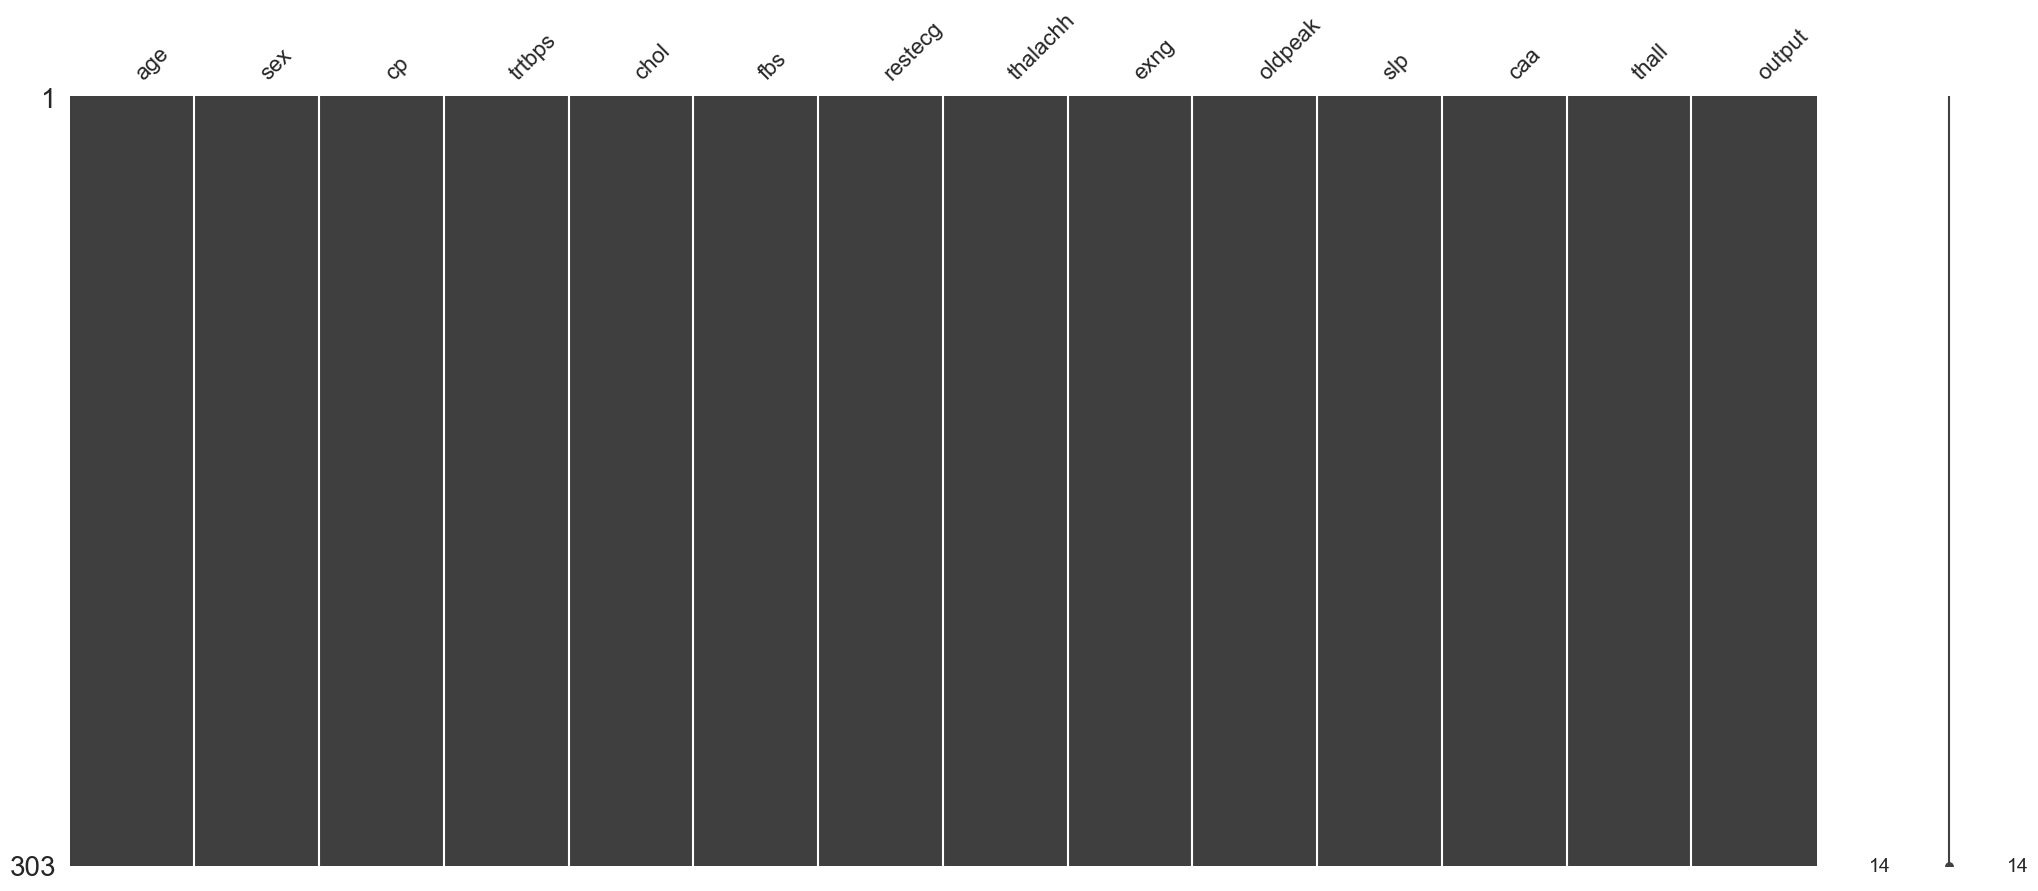

<Figure size 640x480 with 0 Axes>

In [55]:
import missingno

missingno.matrix(heart)
plt.show()
plt.savefig('missingno.png')

In [13]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Shape of dataset

In [14]:
heart.shape

(303, 14)

Column information

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


null values

In [16]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Describe function

In [17]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Visualization

In [18]:
# sns.pairplot(heart,hue='output')
# plt.savefig('pairplot.png')

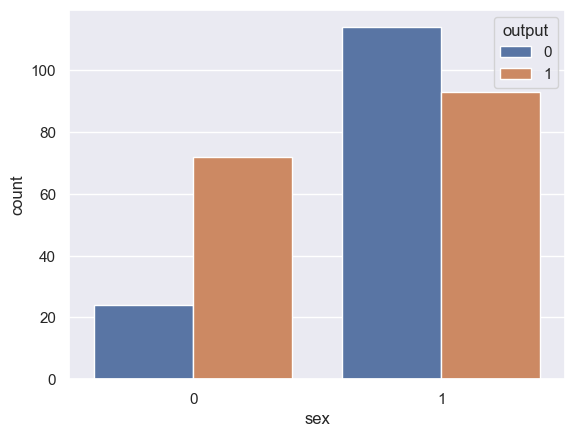

In [19]:
sns.countplot(hue=heart['output'],x=heart['sex'])
plt.savefig('countplot-sex.png')

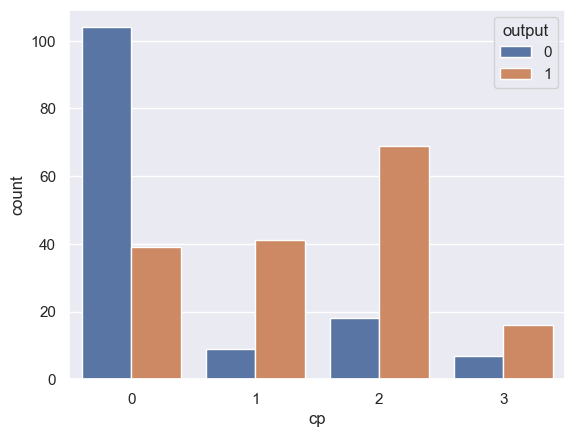

In [20]:
sns.countplot(x=heart['cp'],hue=heart['output'])
plt.savefig('countplot-cp.png')

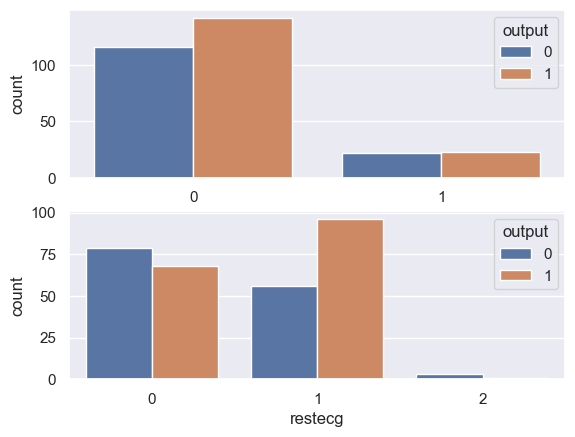

In [21]:
plt.subplot(2,1,1)
sns.countplot(x=heart['fbs'],hue=heart['output'])
plt.savefig('countplot-fbs.png')
plt.subplot(2,1,2)
sns.countplot(x=heart['restecg'],hue=heart['output'])
plt.savefig('countplot-restecg.png')

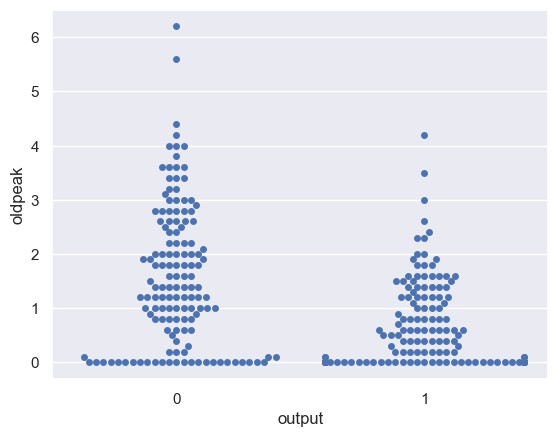

In [22]:
sns.swarmplot(x=heart['output'],y=heart['oldpeak'])
plt.savefig('swarm-oldpeak.png')

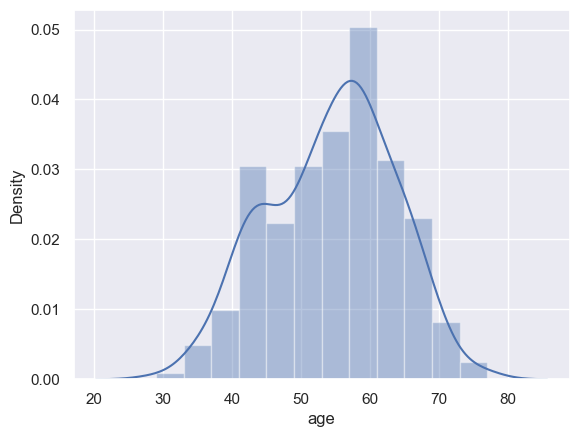

In [23]:
sns.distplot(heart['age'],hist=True,kde=True)
plt.savefig('dist-age.png')

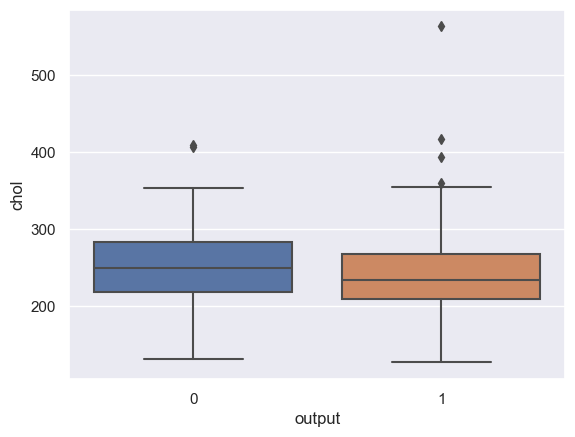

In [24]:
sns.boxplot(x=heart['output'],y=heart['chol'])
plt.savefig('box-chol.png')

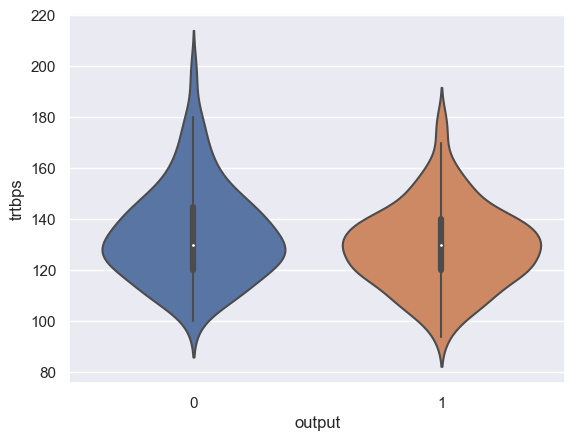

In [25]:
sns.violinplot(x=heart['output'],y=heart['trtbps'])
plt.savefig('violin-trtbps.png')

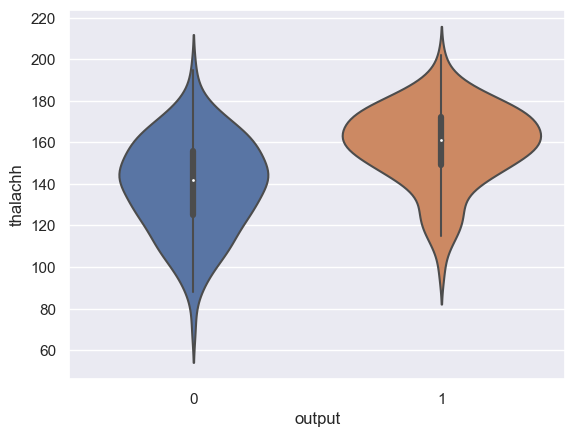

In [26]:
sns.violinplot(x=heart['output'],y=heart['thalachh'])
plt.savefig('violin-thalachh.png')

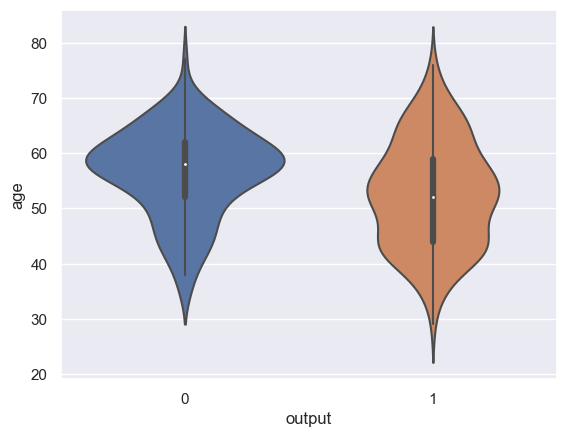

In [27]:
sns.violinplot(x=heart['output'],y=heart['age'])
plt.savefig('violin-age.png')

Correlation

In [28]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Heatmap

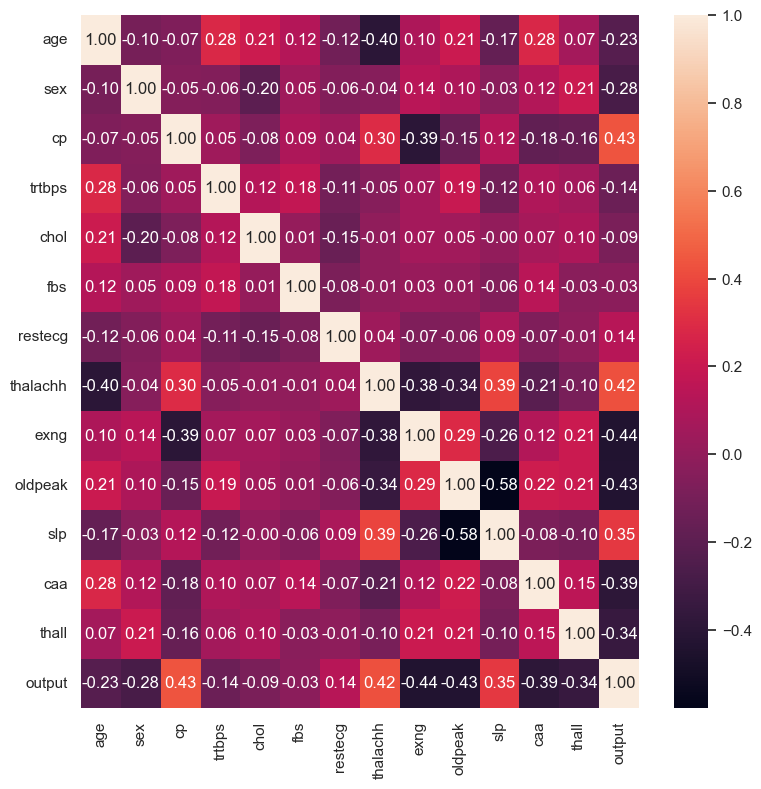

In [29]:
plt.figure(figsize=[9,9])
sns.heatmap(heart.corr(),annot=True,fmt=".2f")
plt.savefig('heatmap.png')

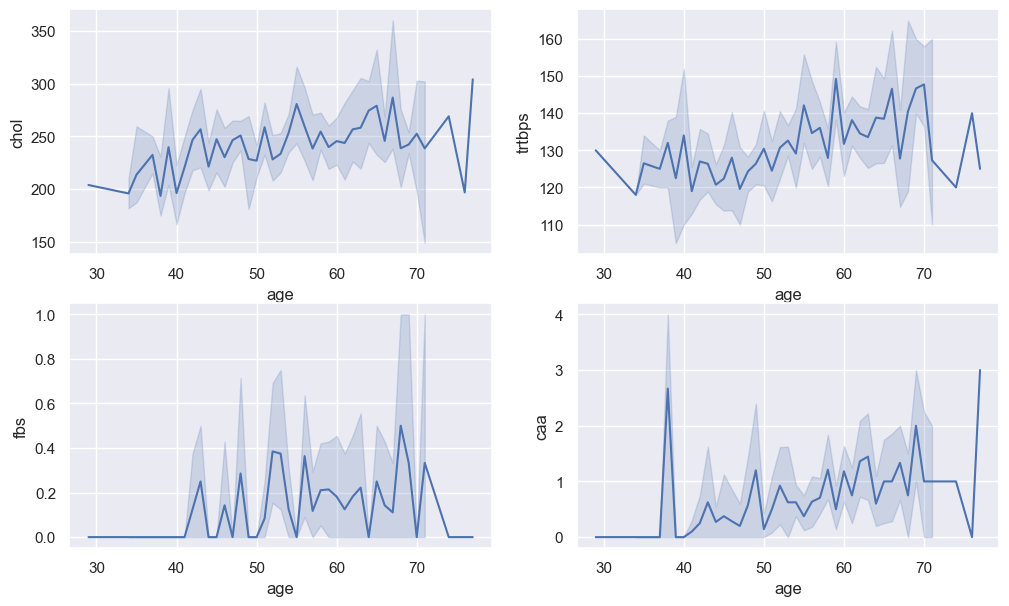

In [30]:
plt.figure(figsize=[12,7])
plt.subplot(2,2,1)
sns.lineplot(x='age',y='chol',data=heart)
plt.savefig('line-age-chol.png')
plt.subplot(2,2,2)
sns.lineplot(x='age',y='trtbps',data=heart)
plt.savefig('line-age-trtbps.png')
plt.subplot(2,2,3)
sns.lineplot(x='age',y='fbs',data=heart)
plt.savefig('line-age-fbs.png')
plt.subplot(2,2,4)
sns.lineplot(x='age',y='caa',data=heart)
plt.savefig('line-age-caa.png')

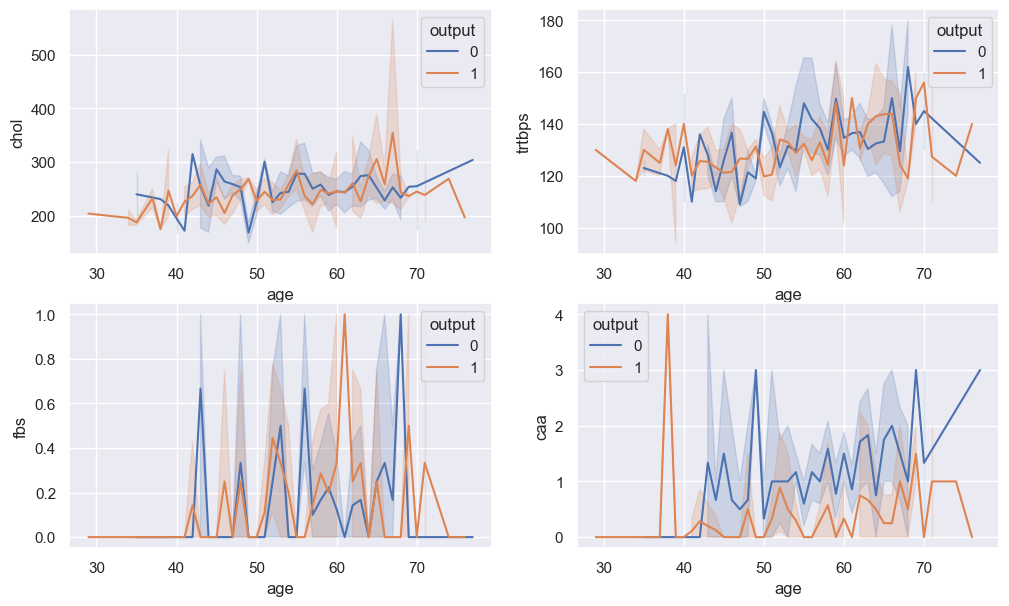

In [31]:
plt.figure(figsize=[12,7])
plt.subplot(2,2,1)
sns.lineplot(x='age',y='chol',data=heart,hue='output')
plt.savefig('line-age-chol.png')
plt.subplot(2,2,2)
sns.lineplot(x='age',y='trtbps',data=heart,hue='output')
plt.savefig('line-age-trtbps.png')
plt.subplot(2,2,3)
sns.lineplot(x='age',y='fbs',data=heart,hue='output')
plt.savefig('line-age-fbs.png')
plt.subplot(2,2,4)
sns.lineplot(x='age',y='caa',data=heart,hue='output')
plt.savefig('line-age-caa.png')



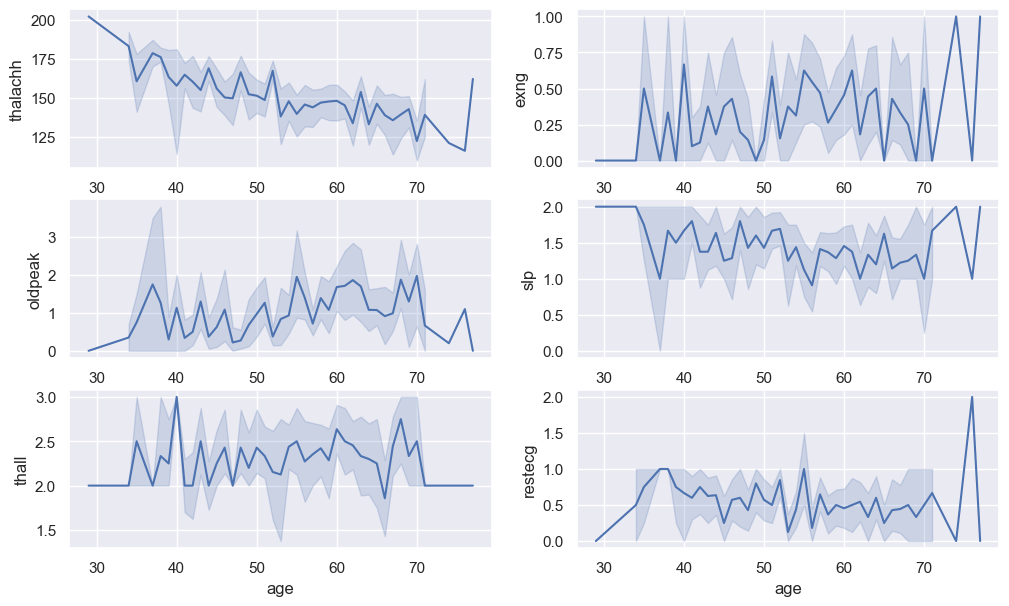

In [32]:
plt.figure(figsize=[12,7])
plt.subplot(3,2,1)
sns.lineplot(x='age',y='thalachh',data=heart)
plt.savefig('line-age-thalachh.png')
plt.subplot(3,2,2)
sns.lineplot(x='age',y='exng',data=heart)
plt.savefig('line-age-exng.png')
plt.subplot(3,2,3)
sns.lineplot(x='age',y='oldpeak',data=heart)
plt.savefig('line-age-oldpeak.png')
plt.subplot(3,2,4)
sns.lineplot(x='age',y='slp',data=heart)
plt.savefig('line-age-slp.png')
plt.subplot(3,2,5)
sns.lineplot(x='age',y='thall',data=heart)
plt.savefig('line-age-thall.png')
plt.subplot(3,2,6)
sns.lineplot(x='age',y='restecg',data=heart)
plt.savefig('line-age-restecg.png')

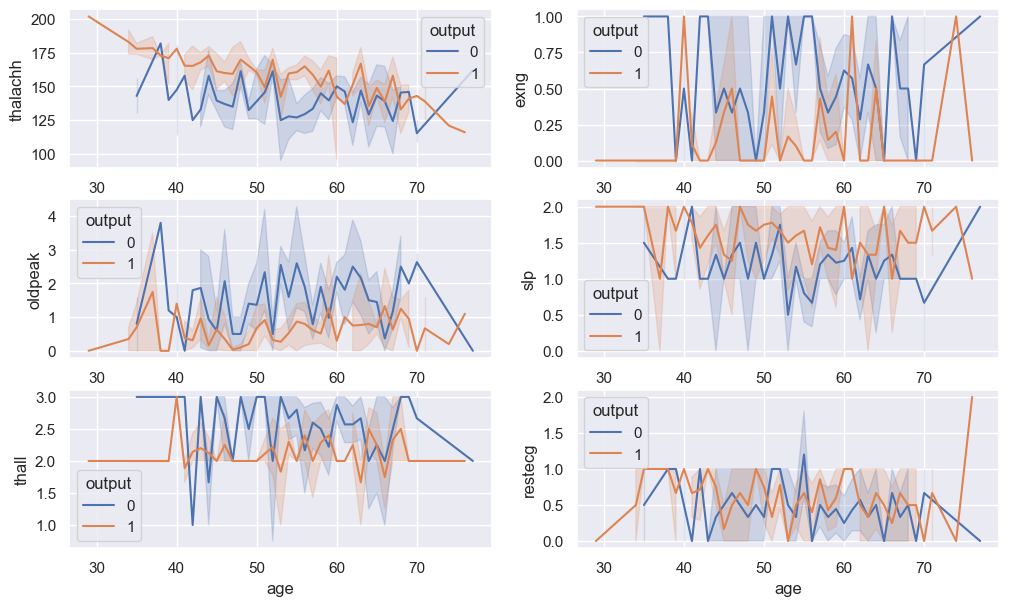

In [33]:
plt.figure(figsize=[12,7])
plt.subplot(3,2,1)
sns.lineplot(x='age',y='thalachh',data=heart,hue='output')
plt.savefig('line-age-thalachh.png')
plt.subplot(3,2,2)
sns.lineplot(x='age',y='exng',data=heart,hue='output')
plt.savefig('line-age-exng.png')
plt.subplot(3,2,3)
sns.lineplot(x='age',y='oldpeak',data=heart,hue='output')
plt.savefig('line-age-oldpeak.png')
plt.subplot(3,2,4)
sns.lineplot(x='age',y='slp',data=heart,hue='output')
plt.savefig('line-age-slp.png')
plt.subplot(3,2,5)
sns.lineplot(x='age',y='thall',data=heart,hue='output')
plt.savefig('line-age-thall.png')
plt.subplot(3,2,6)
sns.lineplot(x='age',y='restecg',data=heart,hue='output')
plt.savefig('line-age-restecg.png')

Log Transformation

In [34]:
heart["age"]= np.log(heart.age)
heart["trtbps"]= np.log(heart.trtbps)
heart["chol"]= np.log(heart.chol)
heart["thalachh"]= np.log(heart.thalachh)

Training and Testing Datasets

In [35]:
X = heart.drop(['output'],axis=1)
y = heart['output']

StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Linear Regression Score

In [39]:
print('Training Model Score :',lr.score(X_train,y_train))
print('Testing Model Score :',lr.score(X_test,y_test))

Training Model Score : 0.5076675317648797
Testing Model Score : 0.536965153866027


Logistic Regression

In [40]:
lre = LogisticRegression()
lre.fit(X_train,y_train)

LogisticRegression()

Logistic Regression Score

In [41]:
print('Training Model Score :',lre.score(X_train,y_train))
print('Testing Model Score :',lre.score(X_test,y_test))

Training Model Score : 0.8636363636363636
Testing Model Score : 0.8360655737704918


Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

Random Forest Regression Score

In [44]:
print('Training Model Score :',rfc.score(X_train,y_train))
print('Testing Model Score :',rfc.score(X_test,y_test))

Training Model Score : 1.0
Testing Model Score : 0.8688524590163934


KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
print('Training Model Score :',knn.score(X_train,y_train))
print('Testing Model Score :',knn.score(X_test,y_test))

Training Model Score : 0.8884297520661157
Testing Model Score : 0.8852459016393442


In [52]:
y_knn_pred = knn.predict(X_test)

In [53]:
y_knn_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
from sklearn import metrics

In [58]:
print(metrics.classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [59]:
heart.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,4.143135,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1
1,3.610918,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1


DecisionTree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
print('Training Model Score :',model.score(X_train,y_train))
print('Testing Model Score :',model.score(X_test,y_test))

Training Model Score : 1.0
Testing Model Score : 0.8524590163934426


In [63]:
y_dt_pred = model.predict(X_test)

In [64]:
print(metrics.classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



<AxesSubplot: >

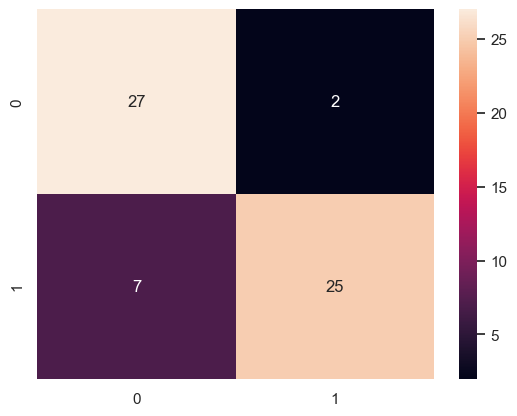

In [66]:
sns.heatmap(metrics.confusion_matrix(y_test,y_dt_pred),annot=True)

SVM

In [67]:
from sklearn.svm import SVC 
sv = SVC(kernel='rbf')

In [68]:
sv.fit(X_train,y_train)

SVC()

In [69]:
print('Training Model Score :',sv.score(X_train,y_train))
print('Testing Model Score :',sv.score(X_test,y_test))

Training Model Score : 0.9214876033057852
Testing Model Score : 0.8852459016393442


In [72]:
import pickle

with open('heart.pkl','wb') as f:
    pickle.dump(knn,f)